## CNN using MNIST dataset

In [15]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten
from keras.utils import np_utils

In [7]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset

In [8]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


5


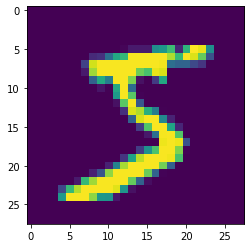

In [46]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])


0


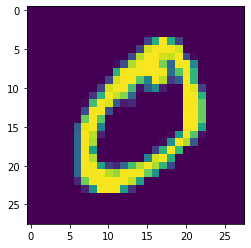

In [47]:
plt.imshow(X_train[1])
print(y_train[1])

In [48]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [49]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [51]:
## Target Classes
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [52]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [53]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [54]:
# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 1.9019 - accuracy: 0.5253 - val_loss: 1.3511 - val_accuracy: 0.6949
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 1.0465 - accuracy: 0.7598 - val_loss: 0.8122 - val_accuracy: 0.8135
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.7057 - accuracy: 0.8291 - val_loss: 0.5980 - val_accuracy: 0.8592
Epoch 4/10
469/469 [

### Using Convolution Layer

In [56]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [59]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [60]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [62]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [63]:
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))

In [64]:
# flatten output of conv
model.add(Flatten())

In [65]:
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [66]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [67]:
# training the model for 10 epochs
callback = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 17s 35ms/step - loss: 0.1933 - accuracy: 0.9444 - val_loss: 0.0883 - val_accuracy: 0.9724
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0576 - val_accuracy: 0.9806
Epoch 3/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 4/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0536 - val_accuracy: 0.9829
Epoch 5/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0509 - val_accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0558 - val_accuracy: 0.9843
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0675 - val_accuracy:

In [28]:
import matplotlib.pyplot as plt

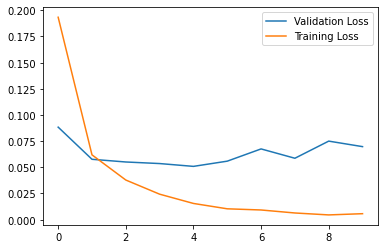

In [68]:
plt.plot(callback.history['val_loss'],label='Validation Loss');
plt.plot(callback.history['loss'],label='Training Loss');
plt.legend();

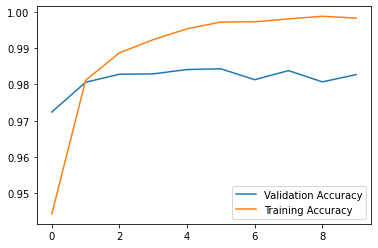

In [69]:
plt.plot(callback.history['val_accuracy'],label='Validation Accuracy');
plt.plot(callback.history['accuracy'],label='Training Accuracy');
plt.legend();

In [70]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9827


[0.06972000002861023, 0.982699990272522]

In [71]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [37]:
y_pred[:5]

array([[1.59239627e-16, 4.90052297e-19, 1.81743997e-12, 2.27550552e-12,
        5.46298016e-22, 1.27645303e-19, 1.99373115e-27, 1.00000000e+00,
        1.88856732e-15, 4.48453471e-12],
       [6.27435065e-18, 2.47959769e-15, 1.00000000e+00, 4.41910192e-20,
        9.84077864e-27, 2.18581499e-25, 2.46984458e-16, 3.38295974e-28,
        1.77712910e-18, 9.19657007e-29],
       [1.10902676e-09, 9.99992728e-01, 4.06629965e-07, 1.43397680e-14,
        2.42164106e-06, 1.82337390e-09, 7.34467953e-09, 4.41854900e-06,
        1.13981633e-08, 1.90484416e-11],
       [1.00000000e+00, 2.88572399e-16, 1.71989242e-10, 6.45667573e-18,
        4.42393801e-22, 1.09775792e-14, 1.11578715e-11, 2.03037608e-12,
        4.15899072e-14, 4.75530252e-17],
       [1.05363439e-12, 7.86124926e-17, 7.63060879e-14, 4.70697215e-16,
        9.99999762e-01, 7.74309345e-17, 1.23749859e-16, 1.18821576e-11,
        3.32967647e-11, 2.05251666e-07]], dtype=float32)

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [72]:
import numpy as np
np.mean(np.argmax(np.round(y_pred,3),axis=1) == y_test)

0.9826